<a href="https://colab.research.google.com/github/anadiedrichs/time-series-analysis/blob/master/Laboratorio_2_smartgrid_hogar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teleinformática: análisis de datos - Laboratorio 2

**Legajo**: COMPLETE

**Nombre**: COMPLETE

**Docente: Ing. Ana Laura Diedrichs**

Topic: Consulta Ana Laura Diedrichs - Miércoles 14 hs y Viernes 20:30 hs - Contraseña Consulta
Zoom Meeting
https://utn.zoom.us/j/94481395966
Meeting ID: 944 8139 5966
Passcode: Consulta

* Email: ana.diedrichs@frm.utn.edu.ar
* Telegram / twitter  @anadiedrichs

## Objetivos del laboratorio:

* Analizar una serie temporal para un problema específico
* Fomentar el trabajo en clase, discusión y aportes de soluciones entre los participantes
* Ser una entrada en calor o introducción del uso del entorno colab.research.google.com y librerías Python como pandas

## Pre-requisitos o pre-condiciones
* Tener una cuenta google (gmail)
* Tener instalado el navegador google chrome 
* Contar con conectividad a Internet

## Entrega y uso del laboratorio

**USO**

* Antes que cualquier cosa, **cree una copia de este notebook: Click en *File*, luego *Save a Copy in Drive***
* Renombre el archivo con el siguiente formato: APELLIDO_NOMBRE_LEGAJO_titulonotebook.ipynb 
Ejemplo: DIEDRICHS_ANA_99999_time_series_argentina.ipynb
* Use el notebook en colab.google, complete las actividades y consignas que se elija. 
* Este laboratorio es una actividad individual.
* Se fomenta el intercambio de opiniones en clase y exposición.

**ENTREGA**

* Una vez finalizado el laboratorio, complete [el formulario de entrega](https://forms.gle/bNJs5czZrZX3fU1M7) indicando
 * Apellido
 * Nombre
 * Nro Legajo
 * Carrera
 * Actividad (cuál laboratorio o actividad)
 * link de su notebook. El mismo se obtiene si realiza click en *Share* (esquina superior derecha) y luego en *Get shareable link* 
 
 
 No se aceptarán otras formas de entrega distintas a la mencionada.

### Importar dataset

#### Descarga del dataset

La fuente u origen del dataset es este enlace
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption


Ejecute los siguientes bloques de código para importar el dataset

In [1]:
from io import StringIO
from zipfile import ZipFile
from urllib.request import urlopen

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"

import requests, zipfile, io
r = requests.get(URL)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")
z.close()


In [2]:
!ls

household_power_consumption.txt  sample_data


In [3]:
# visualizar algunas líneas de un archivo

import os
f = open("/content/household_power_consumption.txt")
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3']
2075260


In [4]:
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


### Describir dataset

Evaluamos el tamaño del dataset: ¿Cuántas variables y cuántas mediciones tiene el dataset? Escriba y ejecute el bloque de código las sentencias para averiguarlo


**Respuesta:**



In [10]:
! wc -l 'household_power_consumption.txt'

2075260 household_power_consumption.txt


In [7]:
len(dataset.columns)

7

In [9]:
len(dataset.index)

2075259

In [11]:
dataset.shape

(2075259, 7)

¿Cuáles son las variables (nombres y de una breve descripción?)
Escriba sus nombres y de una **completa** descripción de cada una de las variables (campos o columnas).

**Respuesta**


### Valores perdidos
¿Cómo están etiquetados los valores perdidos en el dataset? Ayuda visualizar el dataset con el siguiente bloque de código. Indique con qué caracter se marcan los valores perdidos.
**Respuesta:**


In [13]:
dataset.iloc[6832:6841,]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:16:00,0.250,0.000,240.320,1.000,0.000,0.000,0.0
2006-12-21 11:17:00,0.240,0.000,240.570,1.000,0.000,0.000,0.0
2006-12-21 11:18:00,0.242,0.000,241.130,1.000,0.000,0.000,0.0
2006-12-21 11:19:00,0.244,0.000,242.050,1.000,0.000,0.000,0.0
2006-12-21 11:20:00,0.244,0.000,242.080,1.000,0.000,0.000,0.0
2006-12-21 11:21:00,0.242,0.000,241.670,1.000,0.000,0.000,0.0
2006-12-21 11:22:00,0.244,0.000,242.290,1.000,0.000,0.000,0.0
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN


¿Cuántas filas del dataset (mediciones) tienen valores perdidos? Modifique la siguiente sentencia de código que recupera todas las filas con el valor perdido para dar la respuesta. 
**Respuesta**

In [14]:
dataset.loc[dataset["Sub_metering_1"] == "?"].shape

(25979, 7)

**Reemplace el texto CARACTER por el caracter correcto que indica valor perdido y ejecute.**

In [ ]:
# INDICAmos cuales son valores perdidos
dataset.replace('CARACTER', nan, inplace=True)

La función fill_missing reemplaza los valores perdidos. Ejecute el siguiente bloque de código.


In [ ]:
# funcion para reemplazar valores perdidos
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]
        
        
dataset = dataset.astype('float32')
        
fill_missing(dataset.values)

Explique que es lo que realiza o qué criterio toma para reemplazar los valores perdidos la función *fill_missing*.
**Respuesta**

### Interpretaciones

#### Ejercicio 1 

El siguiente código agrega una columna nueva llamada submetering_4. ¿Qué es lo que representa?


**sub_metering_4 = (global_active_power * 1000 / 60) - (sub_metering_1 + sub_metering_2 + sub_metering_3**

**Respuesta**

In [ ]:
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

#### Ejercicio 2 

¿Qué nos muestra el siguiente gráfico? Ejecute el siguiente bloque de código. Explique e interprete.

**Respuesta**

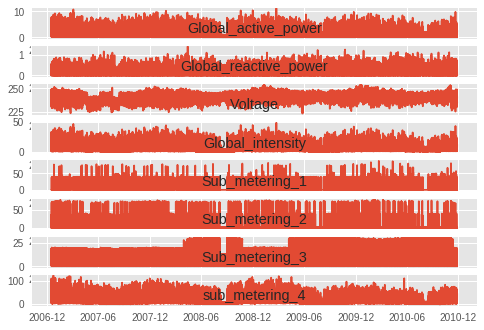

In [ ]:
# line plots
from pandas import read_csv
from matplotlib import pyplot
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

#### Ejercicio 3 

¿Qué nos muestra el siguiente gráfico? Ejecute el siguiente bloque de código. Explique e interprete.

**Respuesta**

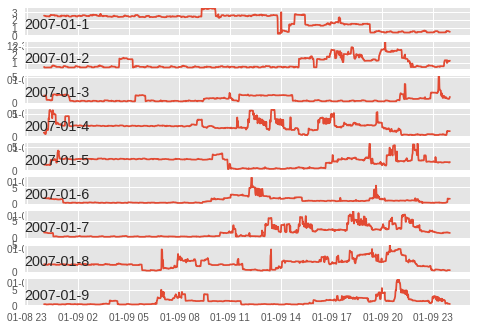

In [ ]:
# daily line plots
from pandas import read_csv
from matplotlib import pyplot
# plot active power for each year
days = [x for x in range(1, 10)]
pyplot.figure()
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

#### Ejercicio 4 

¿Qué nos muestra el siguiente gráfico? Ejecute el siguiente bloque de código. Explique e interprete.

**Respuesta**

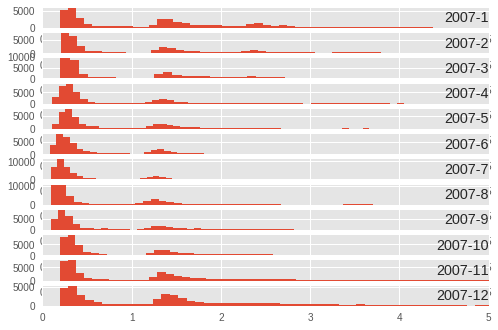

In [ ]:
# monthly histogram plots
from pandas import read_csv
from matplotlib import pyplot
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(month, y=0, loc='right')
pyplot.show()

#### Ejercicio 5 

¿Qué nos muestran los siguientes gráficos? Ejecute los bloques de código. Explique e interprete.

**Respuesta**

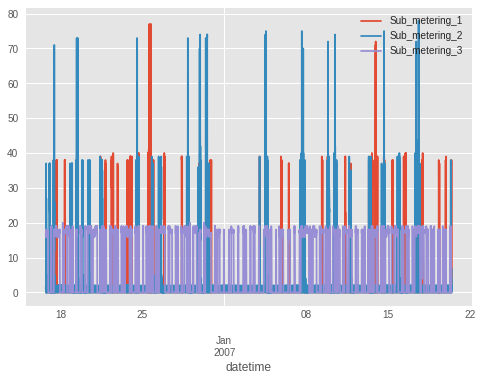

In [ ]:
dataset.iloc[0:50000,4:7].plot()

### Ejercicio 6 

Calcule el consumo promedio anual de cada o zonas. ¿Cuál consume más? ¿cuál menos?

#### Ejercicio 7

¿En qué período ha notado que hubo muy poco consumo en total? Abajo en código muestre los datos del período o grafíquelo.

¿Por qué cree que sea?

#### Ejercicio 8 



Dada su inquietud, 
* ¿Qué otras consultas se pueden hacer sobre este dataset? 
* ¿Qué otras preguntas?